<hr>
<b><font color='red'>Ejercicio 01</font></b>  

Hemos trabajado los datos para la TV, ajusta ahora los datos para la radio y los periodicos, pinta los puntos y la recta.
Haz que salgan tambien los diferentes parametros de ajuste, es decir el valor de $\beta_0$ , $\beta_1$ y R²

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.linear_model as skl_lm

advertising = pd.read_csv('advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


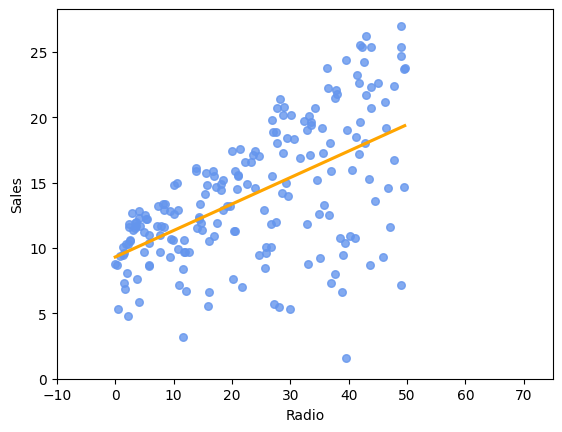

In [9]:
#para la radio
sns.regplot(x=advertising.Radio, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'cornflowerblue', 's':30},color='orange')
# ajusta aun polinómio de orden = order, para ello usa numpy.polyfit
plt.xlim(-10,75)
plt.ylim(ymin=0)
plt.show()

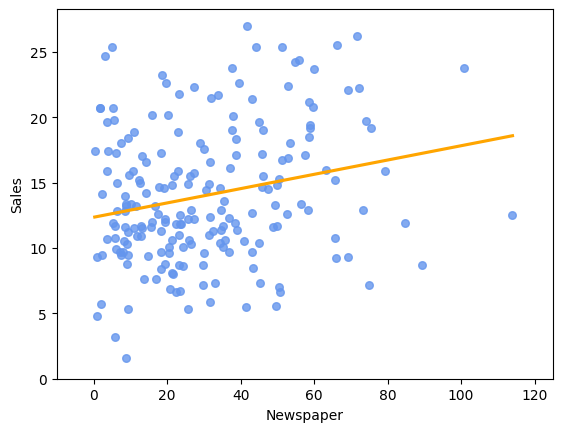

In [10]:
#para los periódicos
sns.regplot(x=advertising.Newspaper, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'cornflowerblue', 's':30},color='orange')
# ajusta aun polinómio de orden = order, para ello usa numpy.polyfit
plt.xlim(-10,125)
plt.ylim(ymin=0)
plt.show()

<hr>
<b><font color='red'>Ejercicio 02</font></b>  

Tratamos de predecir la temperatura a la que hierve el agua ( T ), conocida la presión atmosférica ( P ) en el lugar y momento en que hacemos el experimento.

Para ello, contamos con un conjunto de mediciones de ambas variables, con la temperatura en grados Fahrenheit y la presión en pulgadas de mercurio (sea lo que sea, es una unidad de medidad de presión). Por ejemplo, en un cierto punto de los Alpes, un cierto día, el barómetro marcaba 20.79 pulgadas de mercurio, y el agua hirvió a 194.5 grados Fahrenheit. Las mediciones se realizaron en el mismo lugar geográfico, pero en días distintos, con distintas condiciones atmosféricas y quizá incluso por personas distintas. En estas condiciones, es imposible que ningún modelo prediga con exactitud el valor de T en función de P, pero esperamos que lo haga con un margen de error moderado.

$$
\begin{array}{rrrrrrrrrr}
T&194.5 & 194.3 & 197.9 & 198.4 & 199.4 & 199.9 & 200.9 & 201.1 & 201.4 & 201.3 & 203.6 & 204.6 & 209.5 & 208.6 & 210.7 & 211.9 & 212.2\\
P &20.79&  20.79&  22.4 &  22.67&  23.15&  23.35&  23.89&  23.99& 24.02&  24.01&  25.14&  26.57&  28.49&  27.76&  29.04&  29.88& 30.06
\end{array}
$$

 - Ajusta un modelo lineal a estos datos
 - Calcula el valor de $R^2$ del ajuste
 - Usa el modelo para predecir la temperatura de ebullición del agua cuando la presión es de 26 "pulgadas de mercurio".

In [12]:
datos = np.array(
        [(20.79,194.50),(20.79,194.30),(22.40,197.90),(22.67,198.40),
         (23.15,199.40),(23.35,199.90),(23.89,200.90),(23.99,201.10),
         (24.02,201.40),(24.01,201.30),(25.14,203.60),(26.57,204.60),
         (28.49,209.50),(27.76,208.60),(29.04,210.70),(29.88,211.90),
         (30.06,212.20)])

In [13]:
X = datos[:,0].reshape(-1, 1)
y = datos[:,1]

reg = skl_lm.LinearRegression().fit(X, y)

R_2 = reg.score(X, y)

print("El valor de R^2 es:", R_2)

P = 26
T = reg.predict(np.array([P]).reshape(-1, 1))[0]

print("La temperatura de ebullición del agua cuando la presión es de 26 pulgadas de mercurio es:", T, "grados Fahrenheit")


El valor de R^2 es: 0.9944281526462317
La temperatura de ebullición del agua cuando la presión es de 26 pulgadas de mercurio es: 204.74285508142833 grados Fahrenheit


<hr>
<b><font color='red'>Ejercicio 03</font></b>  

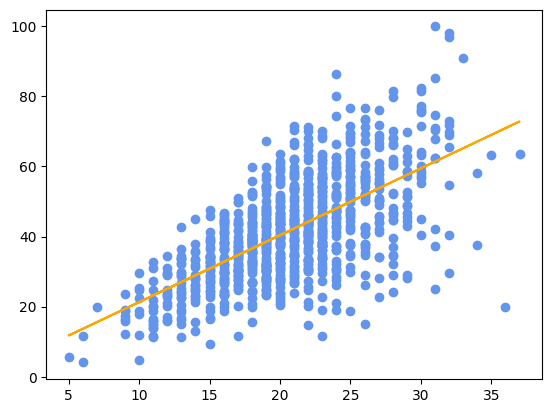

y = ( 1.9080193221952408 ) * x + ( 2.2261946681909492 )


,número de artículos,precio,sexo,día
0,27,42.15,Mujer,jueves
1,26,60.26,Mujer,jueves
2,20,28.12,Hombre,miércoles
3,24,47.48,Hombre,domingo
4,17,50.88,Mujer,sábado


In [17]:
#Utliza el archivo super.cvs
def ajuste_minimos_cuadrados(x,y):
    b1=0
    b1_n=0
    b1_d=0
    for i in range(len(x)):
        b1_n = b1_n + (x[i]- np.mean(x))*(y[i]- np.mean(y))
        b1_d = b1_d + (x[i]-np.mean(x))**2
    b1=b1_n/b1_d
    b0=np.mean(y)-b1*np.mean(x)
    return b1,b0

#Haz un ajuste por mínimos cuadrados del número de articulos respecto al precio
superr = pd.read_csv('super.csv')


x1 = superr['número de artículos'].values
y1 = superr['precio'].values


plt.plot(x1, y1, 'o', color="cornflowerblue")
b1, b0 = ajuste_minimos_cuadrados(x1, y1)

# Pintamos la recta
plt.plot(x1, b1*x1 + b0, color='orange')

    
plt.show()
print("y = (", b1, ') * x + (', b0, ')')
superr.head()




In [18]:
#¿En el caso de que una persona comprase 40 artículos cual sereía la estimación del precio utilizando el valor medio y el modelo que has utilizado ?


superr = pd.read_csv('super.csv')


x1 = superr['número de artículos'].values
y1 = superr['precio'].values

b1, b0 = ajuste_minimos_cuadrados(x1, y1)

precio_estimado = b1 * 40 + b0

print("El precio estimado es :" + str(precio_estimado))

El precio estimado es :78.5469675560006
